In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfperla = pd.read_excel('data/laPertaDataRTU.xlsx')
dfperla.head()

,%dir,flowInd,flowStat,timeFirst,timeLast,duration,srcIP,srcPort,dstIP,dstPort,...,dstPortClassN,dstPortClass,nDPIMasterProto,nDPISubProto,nDPIclass,numPktsSnt,numPktsRTAggr,numBytesSnt,numBytesRTAggr,tcpStatesAFlags
0,B,4348,0x0400000000004001,1.673971e+09,1.673971e+09,0.456567,9.9.5.30,20000,9.9.5.10,50515,...,20000,dnp,244,0,DNP3,19,47,1110,5300,0x03
1,A,4348,0x0400000000004000,1.673971e+09,1.673971e+09,19.672863,9.9.5.10,50515,9.9.5.30,20000,...,20000,dnp,244,0,DNP3,28,47,4190,5300,0x43
2,A,4367,0x0400000000004000,1.673971e+09,1.673971e+09,0.000000,9.9.5.10,24556,9.9.5.30,20000,...,20000,dnp,244,0,DNP3,1,2,0,0,0x03
3,B,4367,0x0400000000004001,1.673971e+09,1.673971e+09,0.000000,9.9.5.30,20000,9.9.5.10,24556,...,20000,dnp,244,0,DNP3,1,2,0,0,0x43
4,A,4369,0x0400000000004000,1.673971e+09,1.673971e+09,0.000000,9.9.5.10,24558,9.9.5.30,20000,...,20000,dnp,244,0,DNP3,1,2,0,0,0x03


In [11]:
dfperla['timeLast'] = pd.to_datetime(dfperla['timeLast'],unit='s')

In [15]:
dfperla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   %dir             6167 non-null   object        
 1   flowInd          6167 non-null   int64         
 2   flowStat         6167 non-null   object        
 3   timeFirst        6167 non-null   float64       
 4   timeLast         6167 non-null   datetime64[ns]
 5   duration         6167 non-null   float64       
 6   srcIP            6167 non-null   object        
 7   srcPort          6167 non-null   int64         
 8   dstIP            6167 non-null   object        
 9   dstPort          6167 non-null   int64         
 10  l4Proto          6167 non-null   int64         
 11  dstPortClassN    6167 non-null   int64         
 12  dstPortClass     6167 non-null   object        
 13  nDPIMasterProto  6167 non-null   int64         
 14  nDPISubProto     6167 non-null   int64  

<Axes: xlabel='timeLast'>

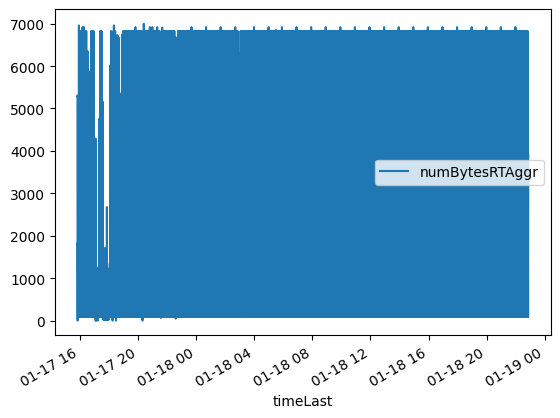

In [21]:
df = dfperla.eval("(srcIP == '9.9.5.30' | (dstIP == '9.9.5.30')) & (nDPIMasterProto == 244) &  ")]
df.plot(x="timeLast", y=["numBytesRTAggr"])

In [13]:
df = pd.DataFrame({
    "flowInd": [1, 1, 1, 2, 2, 3, 4,5,6,7],
    "nDPIclass": ["m", "n", "o", "m", "m", "n", "n","k","l","z"],
    "numBytesSnt": [500, 400, 300, 200, 100, 90, 80,70,60,50]
})

In [14]:
df

,flowInd,nDPIclass,numBytesSnt
0,1,m,500
1,1,n,400
2,1,o,300
3,2,m,200
4,2,m,100
5,3,n,90
6,4,n,80
7,5,k,70
8,6,l,60
9,7,z,50


In [15]:
df['Counts'] = df.groupby(['flowInd'])['nDPIclass'].transform('count')

In [16]:
df

,flowInd,nDPIclass,numBytesSnt,Counts
0,1,m,500,3
1,1,n,400,3
2,1,o,300,3
3,2,m,200,2
4,2,m,100,2
5,3,n,90,1
6,4,n,80,1
7,5,k,70,1
8,6,l,60,1
9,7,z,50,1
